recomend-intake optimize.py testing
=======================================

In [1]:
import scipy
import scipy.stats
import matplotlib
import pylab
import seaborn
import pandas

%matplotlib inline

In [2]:
import optimize
from micro_reqs import ALL_MICROS

# RDA and UL vectors
columns, RDA, UL = [], [], []
for n, _, _, r, u in ALL_MICROS:
    columns.append(n) #string
    RDA.append(r)
    UL.append(u)

RDA, UL = scipy.array(RDA), scipy.array(UL)

# Food details and food as nutrient vectors
food_details = list(optimize.read_foods("foods.jsontxt.gz"))
foods = scipy.array([optimize.extract_nutrients(f) for f in food_details])

# Food normialized as percent of RDA
foods_rda = pandas.DataFrame(
    foods / RDA, # foods is F x N matrix, RDA is 1 x N vector, division operator does point-wise div per row
    columns=columns
)

    Vitamin B6  Vitamin B12  Magnesium   Calcium
0     0.015882            0   0.011905  0.005833
1     0.055882            0   0.028571  0.005000
2     0.021176            0   0.309524  0.143333
3     0.150588            0   0.619048  0.037500
4     0.025882            0   0.007143  0.004167
5     0.031765            0   0.016667  0.006667
6     0.017647            0   0.047619  0.024167
7     0.025882            0   0.021429  0.013333
8     0.038235            0   0.014286  0.008333
9     0.021176            0   0.047619  0.051667
10    0.005294            0   0.009524  0.073333
11    0.043529            0   0.042857  0.012500


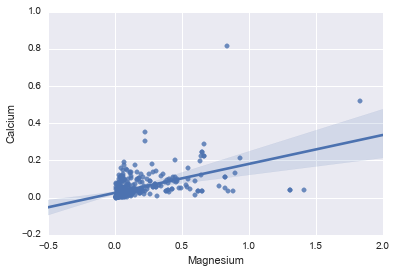

In [3]:
print(foods_rda[:12][["Vitamin B6", "Vitamin B12", "Magnesium", "Calcium"]])
seaborn.regplot("Magnesium", "Calcium", foods_rda)

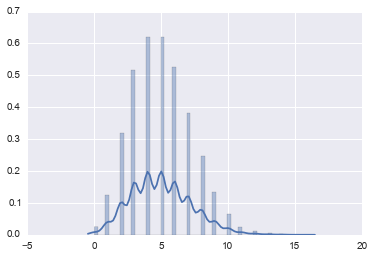

In [4]:
rnds = scipy.stats.binom.rvs(1420.0, 5/1420.0, size=10000)
rnds = pandas.DataFrame(rnds, columns=['R'])
seaborn.distplot(rnds)

In [5]:
for food in sorted(food_details, key=lambda f: f['descrip'].lower()):
    print(food['descrip'])

Alfalfa seeds, sprouted, raw
Apples, canned, sweetened, sliced, drained, heated
Apples, canned, sweetened, sliced, drained, unheated
Apples, dried, sulfured, stewed, without added sugar
Apples, dried, sulfured, uncooked
Apples, raw, with skin
Apples, raw, without skin
Apples, raw, without skin, cooked, boiled
Apples, raw, without skin, cooked, microwave
Apricots, canned, water pack, with skin, solids and liquids
Apricots, dried, sulfured, stewed, without added sugar
Apricots, dried, sulfured, uncooked
Apricots, raw
Artichokes, (globe or french), cooked, boiled, drained, without salt
Artichokes, (globe or french), frozen, cooked, boiled, drained, without salt
Arugula, raw
Asparagus, canned, drained solids
Asparagus, cooked, boiled, drained
Asparagus, frozen, cooked, boiled, drained, without salt
Asparagus, raw
Avocados, raw, all commercial varieties
Balsam-pear (bitter gourd), leafy tips, cooked, boiled, drained, without salt
Balsam-pear (bitter gourd), pods, cooked, boiled, drained, wi